In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
df = pd.read_csv("E:/Image ML Project/image.csv")

In [3]:
df.head()

,Unnamed: 0,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,A
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,A
2,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,A
4,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.shape

(372451, 65)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372451 entries, 0 to 372450
Data columns (total 65 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   pixel0   372451 non-null  int64 
 1   pixel1   372451 non-null  int64 
 2   pixel2   372451 non-null  int64 
 3   pixel3   372451 non-null  int64 
 4   pixel4   372451 non-null  int64 
 5   pixel5   372451 non-null  int64 
 6   pixel6   372451 non-null  int64 
 7   pixel7   372451 non-null  int64 
 8   pixel8   372451 non-null  int64 
 9   pixel9   372451 non-null  int64 
 10  pixel10  372451 non-null  int64 
 11  pixel11  372451 non-null  int64 
 12  pixel12  372451 non-null  int64 
 13  pixel13  372451 non-null  int64 
 14  pixel14  372451 non-null  int64 
 15  pixel15  372451 non-null  int64 
 16  pixel16  372451 non-null  int64 
 17  pixel17  372451 non-null  int64 
 18  pixel18  372451 non-null  int64 
 19  pixel19  372451 non-null  int64 
 20  pixel20  372451 non-null  int64 
 21  pixel21  3

In [7]:
df.label.value_counts()

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13870
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

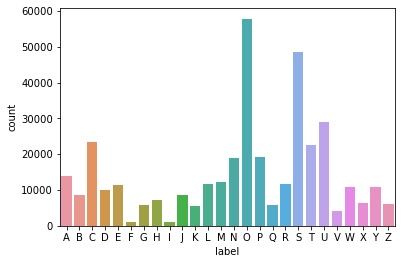

In [8]:
sns.countplot(data = df , x = 'label')

In [9]:
X = df.drop("label",axis=1)
y =df["label"]

## Spliting Data into Train and Test

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=100)

# Building the Model

## 1. KNN Classifier

### Training the data

In [11]:
%%time
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

classifier.fit(X_train,y_train)

CPU times: total: 312 ms
Wall time: 974 ms


KNeighborsClassifier()

In [12]:
%%time
y_test_pred = classifier.predict(X_test)

CPU times: total: 11min 42s
Wall time: 7min 37s


In [13]:
from sklearn import metrics
print("Accuracy Score : ",metrics.accuracy_score(y_test,y_test_pred))

Accuracy Score :  0.757595609635604


## 2.Random Forest Model

In [14]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train,y_train)

CPU times: total: 1min 50s
Wall time: 1min 51s


RandomForestClassifier()

In [15]:
%%time
y_test_pred = rf_classifier.predict(X_test)

CPU times: total: 4.02 s
Wall time: 4.13 s


In [16]:
print("Accuracy Score : ",metrics.accuracy_score(y_test,y_test_pred))

Accuracy Score :  0.9736449260575859


## 3.Decision Tree Model

In [17]:
%%time
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train,y_train)

CPU times: total: 12 s
Wall time: 12.1 s


DecisionTreeClassifier()

In [18]:
%%time
y_test_pred = dt_classifier.predict(X_test)

CPU times: total: 46.9 ms
Wall time: 62.9 ms


In [19]:
print("Accuracy Score : ",metrics.accuracy_score(y_test,y_test_pred))

Accuracy Score :  0.9259179706378271


## 4.Logistic regression Model

In [20]:
%%time
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state = 0)

lr_classifier.fit(X_train,y_train)

CPU times: total: 1min 5s
Wall time: 19 s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [21]:
%%time
y_test_pred = classifier.predict(X_test)

CPU times: total: 10min 28s
Wall time: 7min 19s


In [22]:
print("Accuracy Score : ",metrics.accuracy_score(y_test,y_test_pred))

Accuracy Score :  0.757595609635604


## 5.Gaussian Naive Bayes Model

In [23]:
%%time
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)

CPU times: total: 750 ms
Wall time: 975 ms


GaussianNB()

In [24]:
%%time
y_pred = gnb_classifier.predict(X_test)

CPU times: total: 1.09 s
Wall time: 1.3 s


In [25]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))

Gaussian Naive Bayes model accuracy(in %): 0.441796526800769


## 6.Adaboost Model

In [26]:
%%time
from sklearn.ensemble import AdaBoostClassifier
ad_classifier = AdaBoostClassifier()
ad_classifier.fit(X_train, y_train)

CPU times: total: 54.2 s
Wall time: 55.6 s


AdaBoostClassifier()

In [27]:
%%time
y_test_pred = ad_classifier.predict(X_test)

CPU times: total: 3.09 s
Wall time: 3.32 s


In [28]:
print("Adaboodt model accuracy(in %):",metrics.accuracy_score(y_test, y_test_pred))

Adaboodt model accuracy(in %): 0.5538217005144287


In [33]:
data = {'Algorithm':['Logistic Regression','knn_classifier','Decision Tree','Random Forest','AdaBoost','Naive Bayes'],
       'Accuracy':[0.44,0.75,0.93,0.97,0.55,0.44]}
summary = pd.DataFrame(data,index=[1,2,3,4,5,6])
summary

,Algorithm,Accuracy
1,Logistic Regression,0.44
2,knn_classifier,0.75
3,Decision Tree,0.93
4,Random Forest,0.97
5,AdaBoost,0.55
6,Naive Bayes,0.44


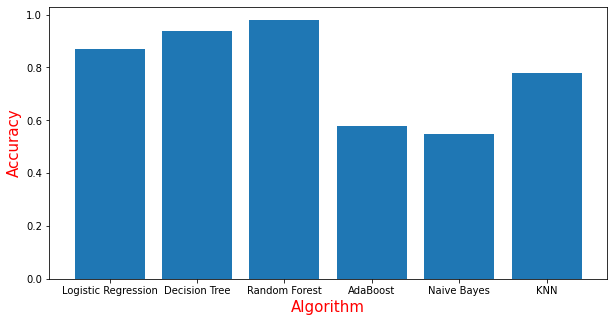

In [30]:
algo=['Logistic Regression','Decision Tree','Random Forest','AdaBoost','Naive Bayes','KNN']
accur=[0.87,0.94,0.98,0.58,0.55,0.78]
plt.figure(figsize=(10,5))

plt.xlabel('Algorithm',fontsize=15,color='r')   
plt.ylabel('Accuracy',fontsize=15,color='r')

plt.bar(algo,accur)
plt.show()

### Conclusion

- From the above model it has been seen that Random Forest has achieved highest accuracy with 97.4% and Decision Tree is 94%.

In [42]:
time_data = {'Algorithm':['knn_classifier','Random Forest','Decision Tree','Logistic Regression','Naive Bayes','AdaBoost'],
       'Alg_cpu_time':['312 ms','1min 50s','12s','1min 5s','750s','54.2ms'],'Prediction_time':['11min 42s','4.02s','469ms','10min 28s','1.09s','3.09s']}

time = pd.DataFrame(time_data,index = [1,2,3,4,5,6])
time

,Algorithm,Alg_cpu_time,Prediction_time
1,knn_classifier,312 ms,11min 42s
2,Random Forest,1min 50s,4.02s
3,Decision Tree,12s,469ms
4,Logistic Regression,1min 5s,10min 28s
5,Naive Bayes,750s,1.09s
6,AdaBoost,54.2ms,3.09s


- AdaBoost has the less cpu time to execute and Random Forest takes more time to execute.
- knn_classifier takes more time to predict and navie bayes takes less time to execute.